Import the libraries we need for the lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
import seaborn as sns

Read in the csv file from the URL using the request library

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Descriptive Statistics

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

Display information about the dataset
Structure of the dataframe
Describe the dataset
Number of rows and columns

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.shape

(506, 14)

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


unnamed is a redundent column, we can delete the column using drop method

In [7]:
boston_df = boston_df.drop('Unnamed: 0', axis=1)

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Plot histogram to get fill of range of values for all columns

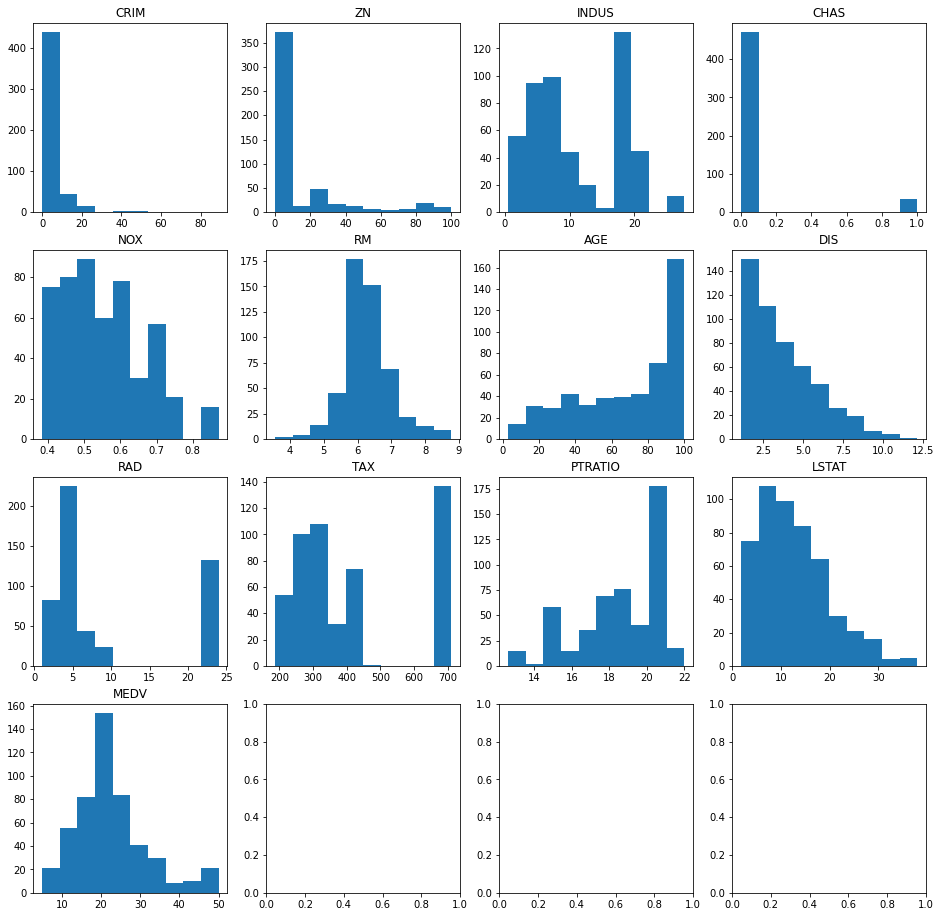

In [9]:
columns = boston_df.columns

fig, ax = plt.subplots(4,4, figsize = (16,16))
for i in range(4):
     for j in range(4):
        if i*4+j < 13:
            ax[i][j].hist(boston_df[columns[i*4+j]]) 
            ax[i][j].set_title(columns[i*4+j])
plt.show() 

Box plot for MEDV value


Text(0.5, 1.0, 'Boxplot for MEDV')

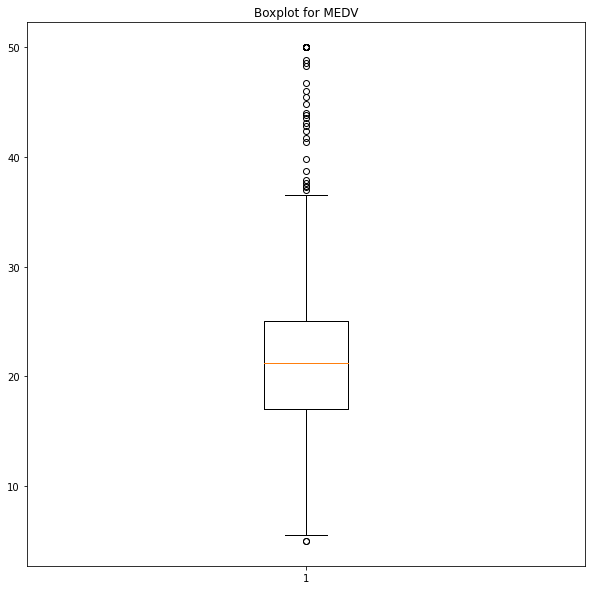

In [34]:
plt.figure(figsize=(10,10))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot for MEDV')

### Barplot for barplot for the Charles river variable

Text(0.5, 1.0, 'barplot for the Charles river variable')

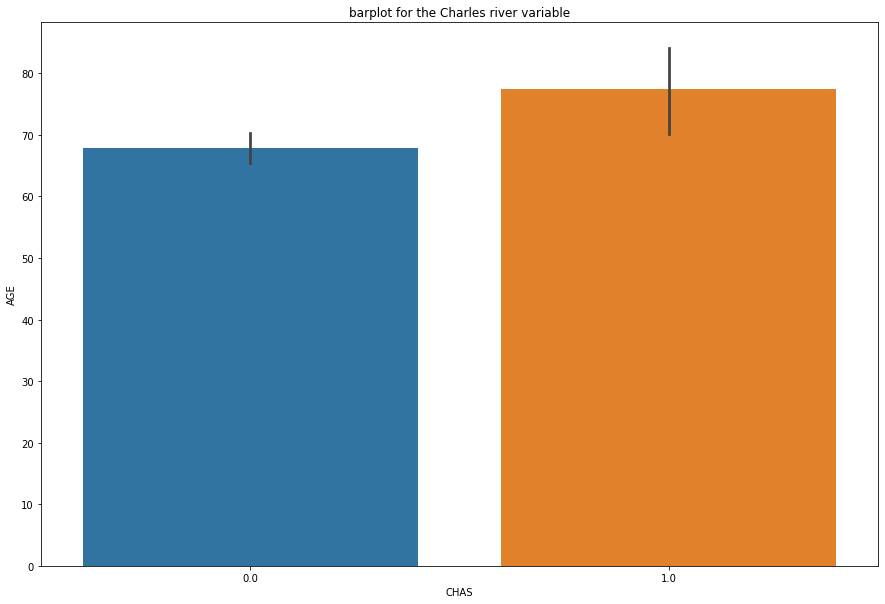

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x = boston_df['CHAS'], y = boston_df['AGE'] )
plt.title('barplot for the Charles river variable')

### Boxplot for the MEDV variable vs the AGE variable. Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

In [17]:
# Create a column of 'AGE_GROUP' in boston_df
boston_df['AGE_GROUP'] = None
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,None
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,None
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,None
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,None
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,None


In [18]:
# Define a function to update new added column 'AGE_GROUP'
def update_col(x):
    x.AGE_GROUP = np.where((x.AGE < 35), 'AGE_less_than_35',x.AGE_GROUP)
    x.AGE_GROUP = np.where((x.AGE > 35) & (x.AGE < 70), 'AGE_bw_35_70',x.AGE_GROUP)
    x.AGE_GROUP = np.where((x.AGE > 70), 'AGE_more_than_70',x.AGE_GROUP)

In [19]:
update_col(boston_df)
boston_df.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,AGE_bw_35_70
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,AGE_more_than_70
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,AGE_bw_35_70
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,AGE_bw_35_70
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,AGE_bw_35_70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,6.65,28.4,AGE_bw_35_70
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,11.34,21.4,AGE_bw_35_70
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,4.21,38.7,AGE_more_than_70
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,3.57,43.8,AGE_bw_35_70


Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE')

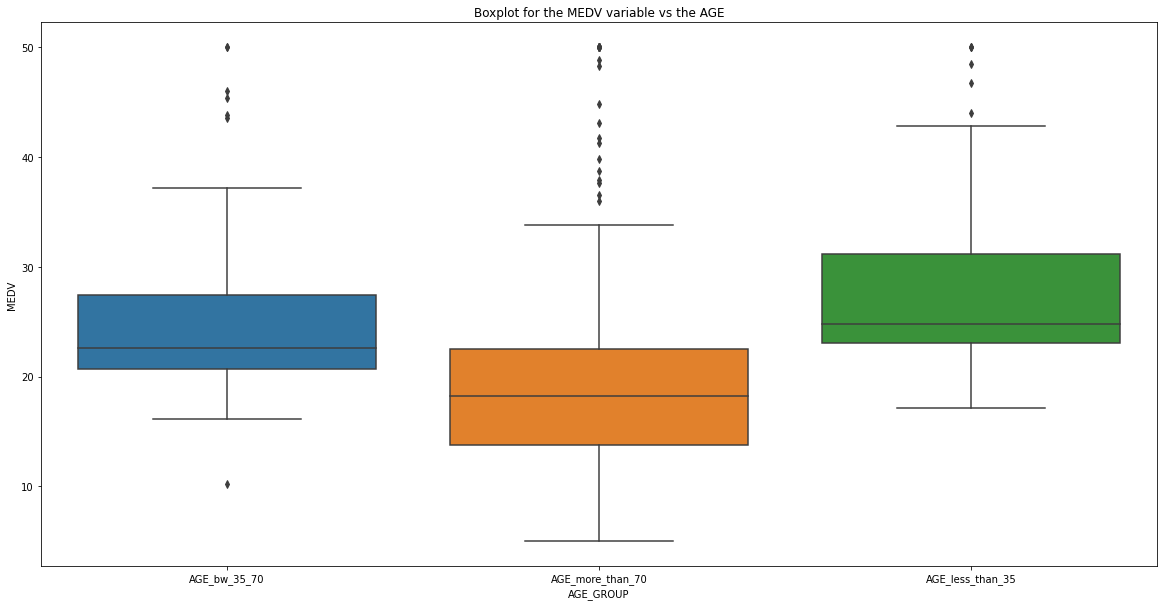

In [30]:
# BoxPlot 
plt.figure(figsize=(20,10))
sns.boxplot(x = boston_df['AGE_GROUP'], y =boston_df['MEDV'])
plt.xlabel('AGE_GROUP')
plt.title('Boxplot for the MEDV variable vs the AGE')

### Scatter plot to show the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)

Text(0.5, 1.0, 'relationship between NOX and INDUS')

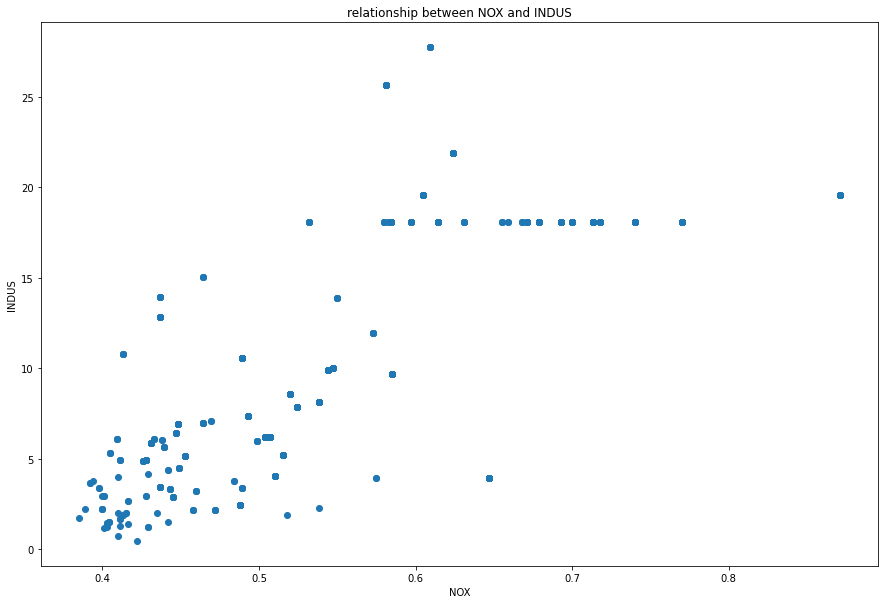

In [32]:
plt.figure(figsize=(15,10))
plt.scatter(boston_df['NOX'],boston_df['INDUS'])
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.title('relationship between NOX and INDUS')

### From the scatter plot it can be concluded that the Nitric oxide concentrations and proportion of non-retail business acres per town are closely correalted to each other.

### # Histogram for PTRATIO 

Text(0.5, 1.0, 'Histogram for teacher ratio')

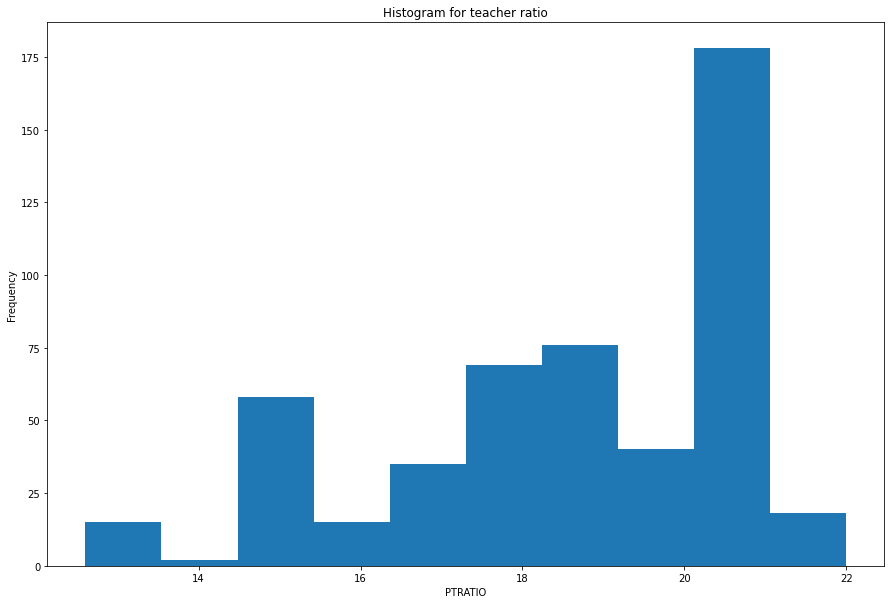

In [31]:
plt.figure(figsize=(15,10))
plt.hist(boston_df['PTRATIO'])
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.title('Histogram for teacher ratio')

### Is there a significant difference in median value of houses bounded by (CHAS)the Charles river or not? (T-test for independent samples)

In [24]:
stats.ttest_ind(boston_df['CHAS'] == 1,boston_df['CHAS'] == 0)

Ttest_indResult(statistic=-53.96009489490948, pvalue=8.757522855106094e-300)

### Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a significant difference in median value of houses bounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis
#### Null Hypothesis
𝐻_0:µ_1=µ_2=µ_3  (the three population means of MEDV are equal )
#### Alernative Hypothesis
𝐻_1:  At least one of the means differ

In [25]:
stats.levene(boston_df[boston_df['AGE_GROUP'] == 'AGE_bw_35_70']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'AGE_less_than_35']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == 'AGE_more_than_70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

### Conclusion: Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [26]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

### The P-value is less than 0.05 so we reject the null hypothesis, that is there is correaltion between  Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV).

#### Null Hypothesis
 𝐻_0:β1  = 0 (DIS has no effect on MEDV)
#### Alternative Hypothesis
 𝐻_1:β1  is not equal to 0 (DIS has an effect on MEDV)

In [27]:
import statsmodels.api as sm

In [28]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        20:41:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value is less than 0.05, so we reject the null hypothesis as there is evidence that there is a impact of additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

In [29]:
# Get the Pearson Coefficient value
np.sqrt(0.062)

0.24899799195977465

#### Conclusion:
The square root of R-squared is 0.25, which implies weak correlation between both features